<a href="https://colab.research.google.com/github/yudhiesh1997/Hands-On-Machine-Learning/blob/master/handsonMLCH8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Dimensionality Reduction 

You do not always have data with a couple of features that are easily plotted when working on Machine Learning Projects. Most of the time you have to handle thousands or millions of features for each training instance. Not only is training slow but it is quite difficult to find an appropriate solution. 

**This is known as the curse of dimensionality.**

Thankfully it is possible to reduce the number of features considerably; turning an intractable problem into a tractable problem. 

For example, in the MNIST dataset you will notice that most of the images are full of white pixels that do not contribute to the prediction and instead take up a lot of space so you could drop them without losing much information. 

Additionally, two pixels side by side are highly correlated so you could take the mean of them and not lose much information. 

**NOTE:**

Reducing the dimensionality does cause information loss, so even though it will reduce the training time it will perform slightly worse. It also makes the pipeline a bit more complex and harder to maintain. So, if training the data is taking too long try using the original data before considering dimensionality reduction. In general it results in a faster training time but probably a worse performing model. 


**Useful:**

#### Data visualization 
Reducing the dimensionality down to 2 or 3 makes it possible to plot and view the condensed form of the data and it is possible to gain some sort of insight to the data with this process by detecting any pattern. 

**DataViz**:

Important to use when communicating the conclusions to people who are not data scientist such as upper management. 

## The Curse of Dimensionality 

Many things behave very differetly on high-dimensional space. 
If yoy pick two ppiunts randomly in a unit square, the distance between these two points will be on average 0.52. With a 3D cube, the average distance will be roughly 0.66. 
If you do this for a 1,000,000 dimensional hypercube the distance will be 408.25 or roughly the square root of 1,000,000 divided by 6. 
Even though they lie in the same hypercube the distance increases as the size of the dimension does. Why is this? Well because there is just so much sspace. Therefore, higher dimensional datasets are very sparse, new training instances are far away from each other which makes it even more difficult to make predictions and these predictions are much less reliable. 
In short, the more dimensions the training set has, the greater the risk to overfit. 

You could increase the size of the training set to reach sufficient density of training instances to solve this but the required amount grows exponentially with the number of dimensions. For instance, with just 100 features you would need more training instances than the number of atoms in the universe to be on average 0.1 from each other.

## Main Approaches for Dimensionality Reduction 



In [6]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [7]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

NameError: ignored

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

In [ ]:
X2D_using_svd = X2D

In [ ]:
X2D[:5]

In [ ]:
X2D_using_svd[:5]


In [ ]:
np.allclose(X2D, -X2D_using_svd)


In [ ]:
X3D_inv = pca.inverse_transform(X2D)

In [ ]:
np.allclose(X3D_inv, X)

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

In [ ]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [ ]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

In [ ]:
pca.components_

In [ ]:
Vt[:2]

In [ ]:
1 -pca.explained_variance_ratio_


In [ ]:
np.square(s) / np.square(s).sum()

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [ ]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: If you are using Matplotlib 3.0.0, it has a bug and does not
# display 3D graphs properly.
# See https://github.com/matplotlib/matplotlib/issues/12239
# You should upgrade to a later version. If you cannot, then you can
# use the following workaround before displaying each 3D graph:
# for spine in ax.spines.values():
#     spine.set_visible(False)

plt.show()

## Projection 

In most real world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within or close to a much lower-dimensional subspace of the high-dimensional space as seen in the plot above. 

Notice that all training instances lie close to a plane. 

This plane is the lower-dimensional subspace of the high-dimensional space. If we project every training instance perpendicularly onto this subspace we get the new 2D dataset below. 

Here the dimensionality is reduced from 3D to 2D. 



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [ ]:

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

## Issues!

However, projection is not always the best approach to dimensionaltiy reduction. In many cases the dataset might twist and turn such as in the famous Swiss Roll dataset like in the plot above.

Simply projecting onto the plane causes multiple data points to overlap as seen in the plot on the bottom left. Instead it is better to unroll the Swill Roll to obtain the 2D dataset on the right. 

In [ ]:

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

In [ ]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

## Manifold Learning

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie: *Manifold Learning*

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a d-dimensional manifold is part of an n-dimensional space where *d<n* that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d =2 and n = 3: it locally resembles a 2D plane but is rolled in the 3rd dimension.

**Manifold hypothesis or Manifold assumption**

Most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is often accompanied by another implicit assumption that the task at hand will be simpler if expressed in the lower-dimensional space of the manifold.

Take the bottom two plots above:

In the 3D space the decision boundary would be fairly complex but in the 2D space it is easily separated with a straight line. 


But this does not always hold true as in the first 2 plots. In the 3D space it looks like the decision boundary is at ${x_1 = 5}$ but in the 2D unrolled manifold the decision boundary is much more complex.

In a nuthsell, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution:

**IT ALL DEPENDS ON THE DATASET!**





## PCA

Principal Component Analysis 

First it identifies the hyperplane that lies closest to the data, and then ir projects the data onto it. 

In [ ]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

### Preserving the Variance

On the right of the plot above we see the three different plots of 3 hyperplanes we can project the data onto. 

The one on the top has the maximum variance while the rest have much lower variance. The reason the one on the top is the best hyperplane is that it preserves the most amount of the data. Another way to justify this is that the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. 


### Principal Components 

PCA identifies the axis that accounts for the largest amount of variance in the training set. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance and so on - as many axes as the number of dimensions in the dataset. 

The $i^{\text {th }}$axis is called the $i^{\text {th }}$ *principal component* (PC) of the data. 


How to find the principal components of a training set? 

The standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix **X** into the matrix multiplication of three matrices :

\begin{equation}
\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{\top}
\end{equation}

where **V** contains the unit vectors that define all the principal components that we are looking for. 


\begin{equation}
\mathbf{V}=\left(\begin{array}{cccc}
\mid & \mid & & \mid \\
\mathbf{c}_{1} & \mathbf{c}_{2} & \cdots & \mathbf{c}_{n} \\
\mid & \mid & & \mid
\end{array}\right)
\end{equation}


**PCA assumes that the dataset is centered around the origin! Make sure to center the data first!**

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]


### Projecting Down to d Dimensions 

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to *d* dimensions by projecting it onto the hyperplane definned by the first *d* prinicipal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible which in turn causes the projection to look very similar to the higher dimensional data. 

\begin{equation}
\mathbf{X}_{d-\mathrm{proj}}=\mathbf{X} \mathbf{W}_{d}
\end{equation}

*Projecting the training set down to d dimensions*

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

### Using Scikit-Learn

Scikit-Learn offers a built in class that uses SVD to implement PCA. Note that it automatically centers the data for us

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

After fitting the PCA transformer to the dataset, its components_ attribute holds the transpose of 
\begin{equation}
\mathbf{W}_{d}
\end{equation}


### Explained Variance Ratio

This indicates the proportion of the datasets variance that lies along each principal component.

1st PC has 84% of the variance 
2nd PC as 14% of the variance 
Which leaves 1.2% for the third PC, so it is reasonable to assume that the third PC has very little information. 

In [ ]:
pca.explained_variance_ratio_

### Choosing the right Number of Dimensions

Instead of manually finding the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance e.g., 95%. 

**Unless** you are reducing the number of dimensions for data visualisation then you should fix it at 2 or 3. 

The code below does that but there is a much bette solution where you set the ratio of the variance you want to maintain in the n_components parameter. 


In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Another option is to plot the explained variance as a function of the number of dimensions. There will be usually an elbow in the curve, where the explained variance stops growing fast. Here you can see that reducing the number of dimensions down to 100 would not lose too much information. 

In [ ]:
# Better method!
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X_train)

## PCA for Compression 

PCA is also used for compression as it easily reduces the size of the input while maintaining most of the variance in it. 

You can also decompress a compressed dataset by applying the inverse transformation of the PCA projection. This will not give you the original dataset, as about 5% of it is lost but it will be very close to the orginal version. 

\begin{equation}
\mathbf{X}_{\text {recovered }}=\mathbf{X}_{d-\text { proj }} \mathbf{W}_{d}^{\top}
\end{equation}

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train) 
X_recovered = pca.inverse_transform(X_reduced)


In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

## Randomized PCA

If you set svd_solver hyperpareter to "randomized", Scikit-Learn uses a stochastic algorithm called *Randomized PCA* that quickly finds an approximation of the first *d* principal components which is much faster than the full SVD approach.  

If *m or n* is greater than 500 and *d* is less than 80% of m or n, or else it will use the full SVD approach. Set it to full if you want the full SVD approach. 


In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCA

One problem with the previous methods mentioned is that they require the dataset to fit into memory in order for the algorithm to run. 

Incremental PCA allows you to split the training set into mini-batches and feed an IPA algorithm one mini-batch at a time. 

This is useful for large training sets or applying PCA online (i.e., on the fly as new instances arrive)



In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

# Alternate way using numpy memmap
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size) 
# inc_pca.fit(X_mm)

for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)


In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [ ]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))


In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## Kernel PCA

Kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space called the feature space which enables nonlinear classification and regression with Support Vector Machines. Remember that a linear decision boundary in a high dimensional feature space is actually a complex nonlinear decision boundary in the *original space*.

It is often good at preserving clusters of instances after projection, or somertimes even unrolling datasets that lie close to a twisted manifold. 

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algoritm, there is no obvious performance measure to help you select the best kernel and hyperparameter values. With that said dimensionality reduction is often a preperation step for a supervised learning task so you can use grid search to select the kernel and hyperparemeters that lead to the best performance on that task .

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

#### Another approach for kPCA

Another approach, this time entirely unsupervised, is to select the kernel and hyper‐ parameters that yield the lowest reconstruction error. Note that reconstruction is not as easy as with linear PCA. Here’s why. The Swiss roll 3D dataset (top left) and the resulting 2D dataset after kPCA is applied using an RBF ker‐ nel (top right). Thanks to the kernel trick, this transformation is mathematically equivalent to using the feature map φ to map the training set to an infinite- dimensional feature space (bottom right), then projecting the transformed training set down to 2D using linear PCA.
Notice that if we could invert the linear PCA step for a given instance in the reduced space, the reconstructed point would lie in feature space, not in the original space (e.g., like the one represented by an X in the diagram). Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute the true reconstruction error. Fortunately, it is possible to find a point in the original space that would map close to the reconstructed point. This point is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to the original instance. You can then select the kernel and hyperparameters that minimize this reconstruction pre-image error.

In [ ]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [ ]:
# Performing the reconstruction 

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
# Then compute the reconstruction pre-image error 

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

In [ ]:
# Now use grid search with cross-validation to find the kernel and hyperparameters that minimize the error

## Locally Linear Embedding (LLE)

It is another powerful nonlinear dimensionality reduction technique. It is a Manifold Learning technique that does not rely on projections, like the previous algorithms do. 

LLE works by first measuring how each training instance linearly relates to its closest neighbors and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. This approach makes it good at unrolling twisted manifolds, especially when there is not too much noise. 



In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()


As you can see, the Swiss roll is completely unrolled, and the distances between instances are locally well preserved. However, distances are not preserved on a larger scale: the left part of the unrolled Swiss roll is stretched, while the right part is squeezed. Nevertheless, LLE did a pretty good job at modeling the manifold.

## Other Dimensionality Reduction techniques

#### Random Projections :
It projects the data to a lower-dimensional space using a random linear projection but it turns out that such a random projection is actually very likely to preserve distances as well. 

#### Multidimentional Scaling (MDS)
Reduces dimensionality while trying to preserve the distances between the instances.

#### Isomap 
Creates a graph by connecting each instance to its nearest neighbors while trying to preserve the shortest path or the geodesic distances between the instances.

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Reduces dimensionality while trying to keep similar instances close and dissimi‐ lar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

#### Linear Discriminant Analysis (LDA)
Is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit of this approach is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# Exercises
1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

  **Main motivations :**

  Speed up a training algorithm.

  To visualize and gain insight of the data. 

  To save space.

  **Drawbacks:**

  Some information is lost which degrades the models overall performance.

  Adds complexity to the overall ML pipeline.

  Can be computationally intensive.

  Transformed features are often harder to interpert.

2. What is the curse of dimensionality?

  **This refers to the fact that many problems that do not exist in a lower dimension arise when in a higher dimensional space. Higher dimensional sampled vectors are very sparse from one another which leads to the risk of overfitting the data as well as making it difficult to identify patterns in the data without having plenty of training data.**

3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

  **Yes it can be done but the dataset will be not exactly the same as the original one. Some algorithms such as PCA have the option to reverse the transformed data but others such as T-SNE do not have this capability.**

4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

  **PCA can be used to signinficantly reduce the dimensionality of a dataset even if they are nonlinear as it gets rid of the useless dimensions. But if the dataset has no useless dimensions such as the Swiss Roll dataset then it will do a bad job as it squashes the dataset instead of unrolling it. In these cases Manifold Learning would be a better option as it unrolls the data.**

5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

  **It depends on the dataset! If the data is composed of points that are almost perfectly aligned then you would only need a single PC or 1 dimension. But if the dataset was randomly spread out then you will need much more to preserve 95% of the variance (950 dimensions in the worst case).**

6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

  **Regular PCA is the default, but it only works for data that fits in the memory of the device. Incremental PCA works well if the data does not fit into the memory where it then sends the data in batches but the downside of it is that it is slower than regular PCA. Incremental PCA is good for online learning where the model gets updated constantly on new instances. Randomized PCA works well when you want to reduce the dimension of the dataset significantly and the data fits into the memory of the device in this case it works faster than regular PCA. Kernel PCA is used for nonlinear datasets.**

7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

  **If the dimensionality algorithm allows for reversing the transformed data then you can reverse it and calculate the reconstruction error compared to the original dataset. If it has a lower reconstruction error then it retains more of the original information which means that it is performing well. Another way is if you are using dimensionality reduction for preprocessing, compare the performance of the model with the original dataset and the transformed dataset. If it does well then they should be quite similar.**

8. Does it make any sense to chain two different dimensionality reduction algorithms?

  **Yes it does you can use PCA and LLE together. With PCA you get rid of the useless dimensions in the data then you can use LLe which is a much slower dimensionality reduction algorithm like LLE. Here it gets the same results with just using LLE but a fraction of the time of just using LLE.**





## Exercise 9. 

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np 

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
X = mnist["data"]
y = mnist["target"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time 

rf = RandomForestClassifier(random_state=42)
t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()


In [ ]:
print(f'Time for training on Random Forest without PCA {t1-t0:.2f} seconds')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
print(f'Accuracy score of Random Forest without PCA : {accuracy_score(y_test, y_pred):.2f}%')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
rf2 = RandomForestClassifier(random_state=42)

t2 = time.time()
rf2.fit(X_train_reduced, y_train)
t3 = time.time()

In [ ]:
print(f'Time for training on Random Forest with PCA {t3-t2:.2f} seconds')

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred2 = rf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred2)
print(f'Accuracy score of Random Forest with PCA : {accuracy_score(y_test, y_pred2):.2f}%')

#### PCA makes training even longer and with a reduced accuracy which is expected! PCA can improve the speed but it depends on the dataset. It wont always do so as shown above. The reduction in accuracy is expected as you lose some of the information from the original dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [ ]:
print(f'Time for training on Logistic Regression without PCA {t1-t0:.2f} seconds')

In [ ]:
y_pred3 = log_clf.predict(X_test)
print(f'Accuracy of Logistic Regression without PCA {accuracy_score(y_test, y_pred3):.2f}%')

In [ ]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train_reduced, y_train)
t1 = time.time()

In [ ]:
print(f'Time for training on Logistic Regression with PCA {t1-t0:.2f} seconds')

In [ ]:
y_pred4 = log_clf.predict(X_test_reduced)
print(f'Accuracy of Logistic Regression with PCA {accuracy_score(y_test, y_pred4):.2f}%')

#### With PCA Logistic Regression performs about the same and is 3x faster compared to not uing PCA!

## Exercise 10. 

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐ resent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sam‐ ple or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np 

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [4]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [5]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [6]:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

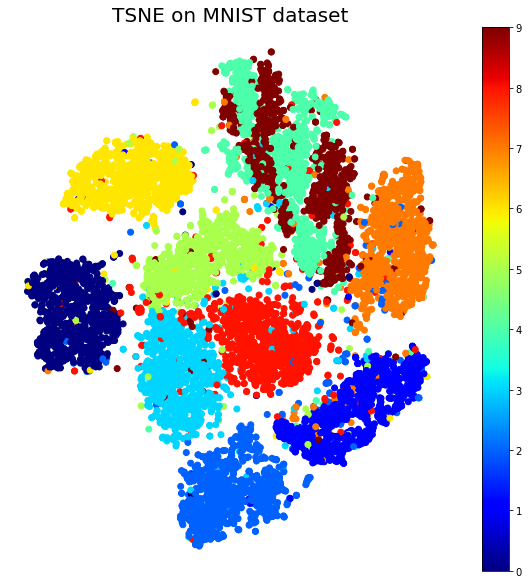

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis("off")
plt.title("TSNE on MNIST dataset", fontsize=20)
plt.colorbar()
plt.show()

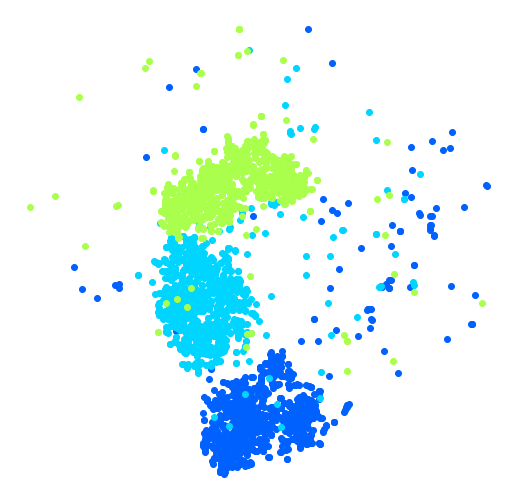

In [15]:
import matplotlib as mpl

plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [17]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

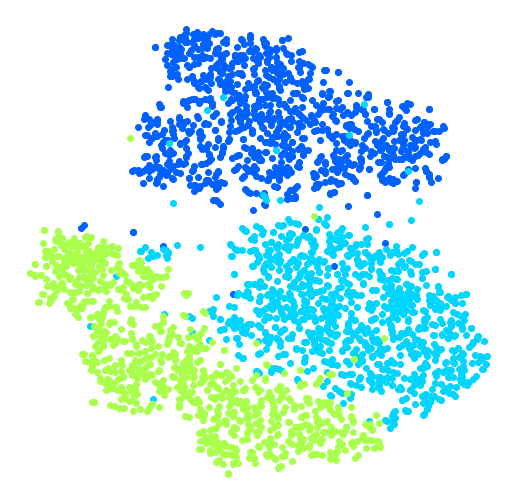

In [18]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

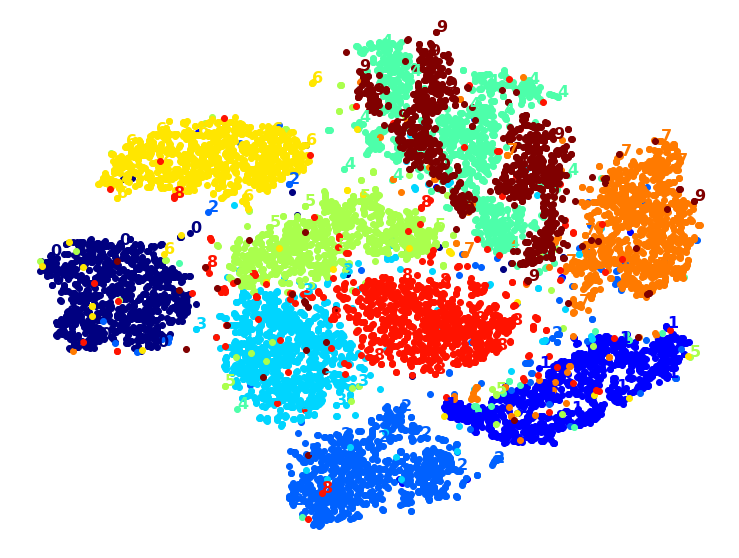

In [20]:
plot_digits(X_reduced, y)

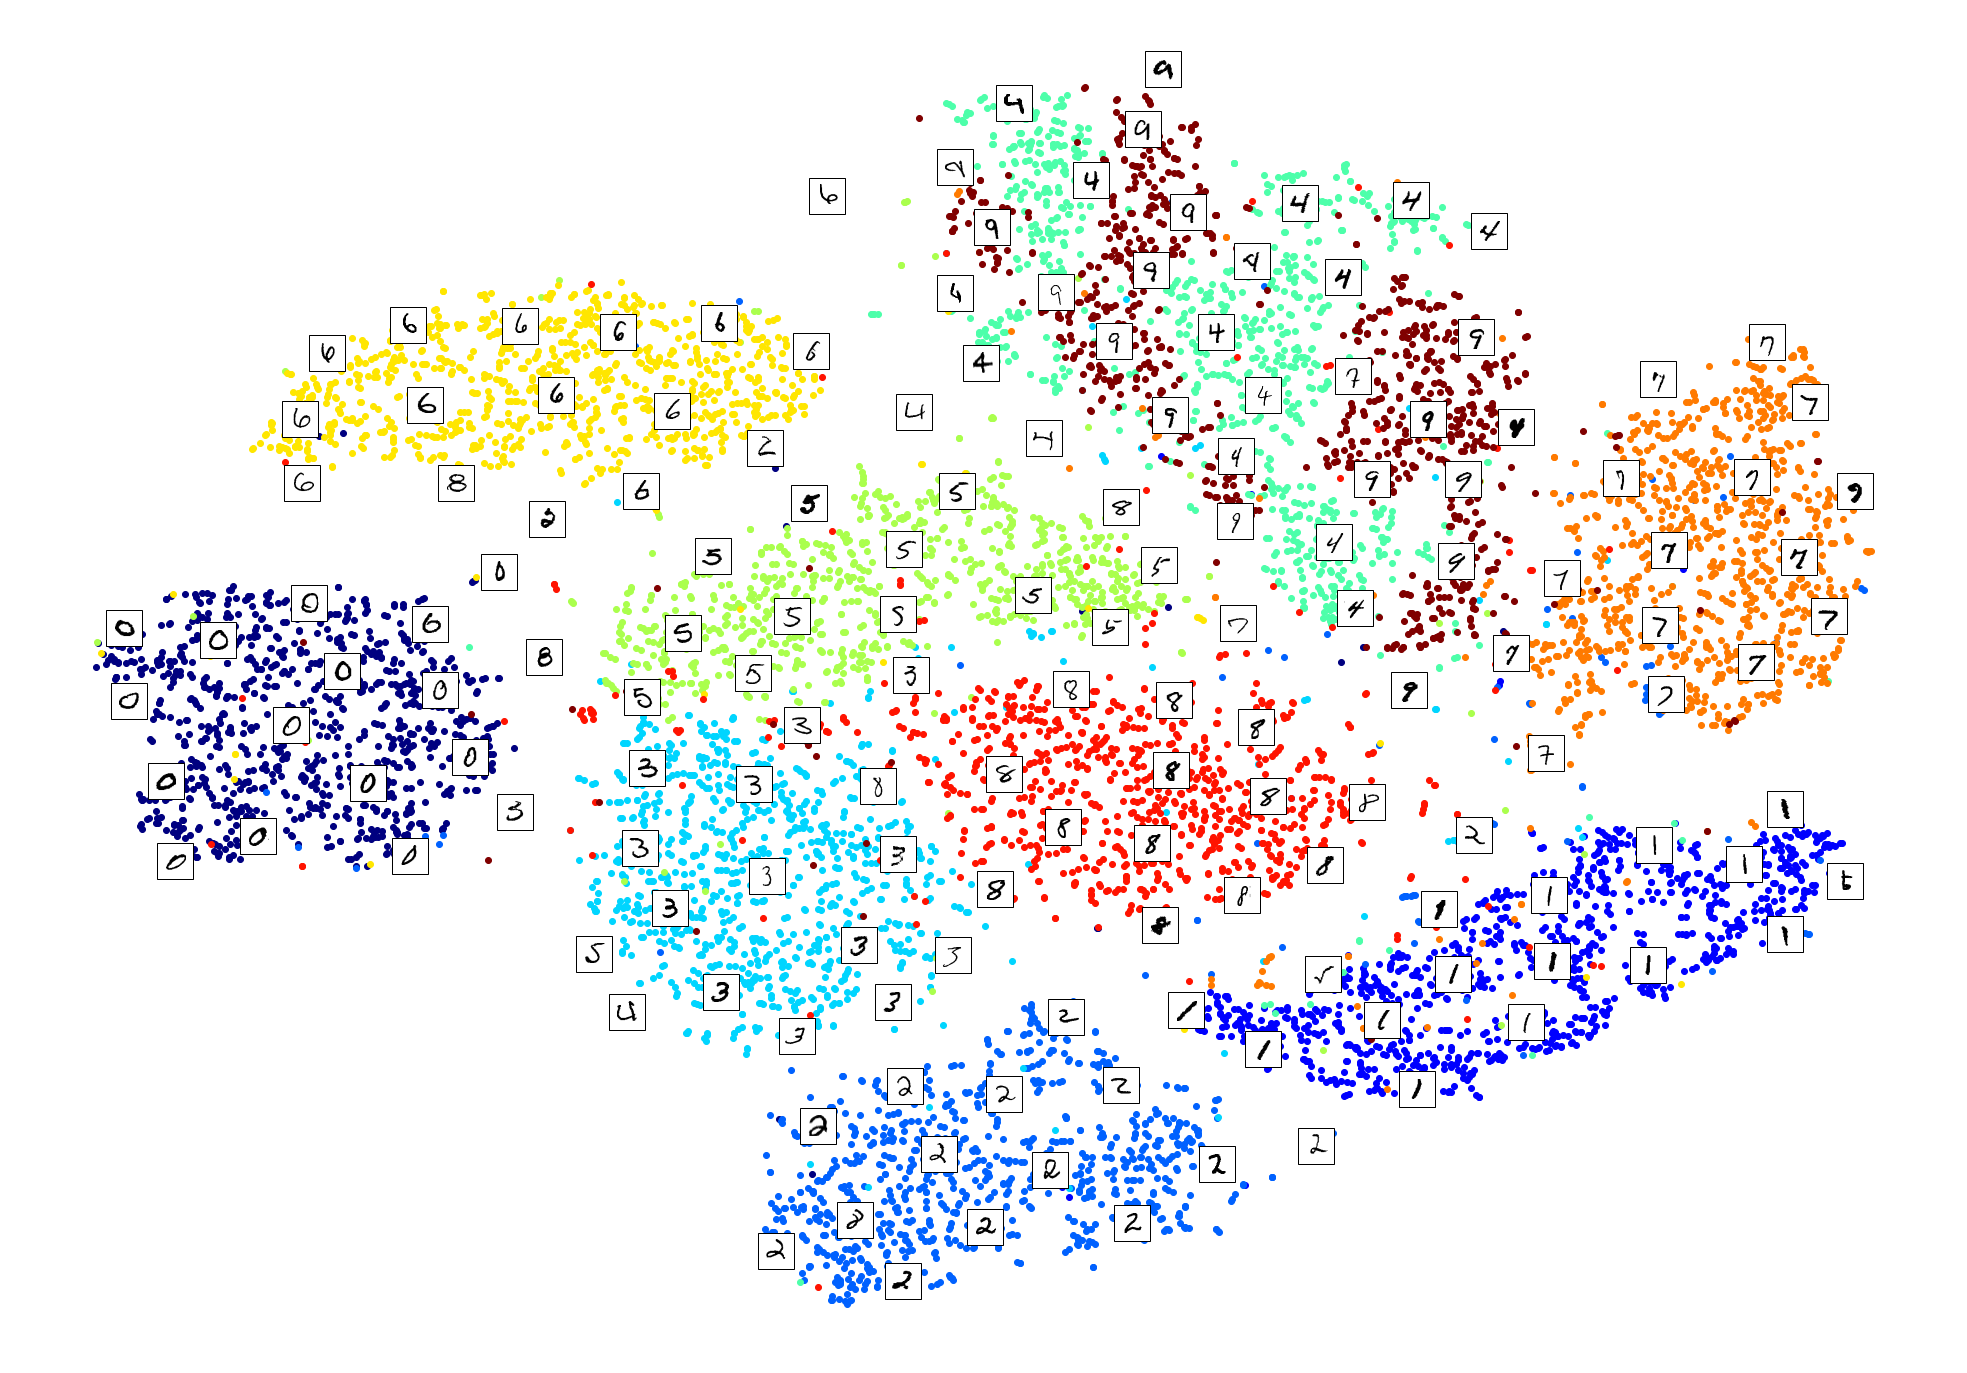

In [21]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

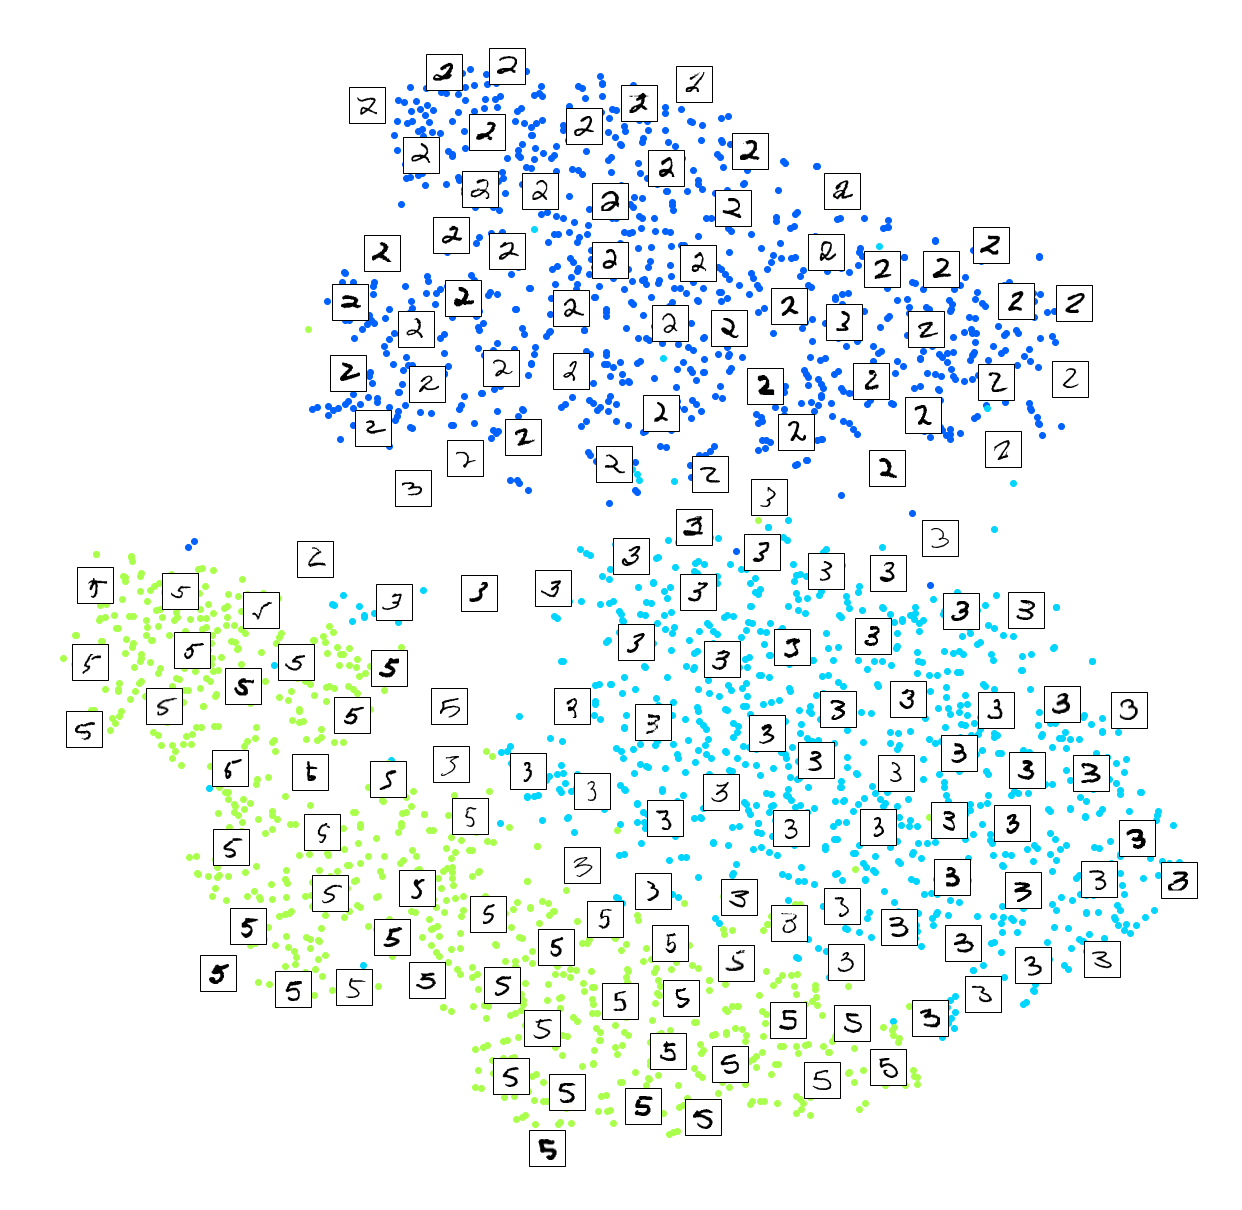

In [22]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

PCA took 0.3s.


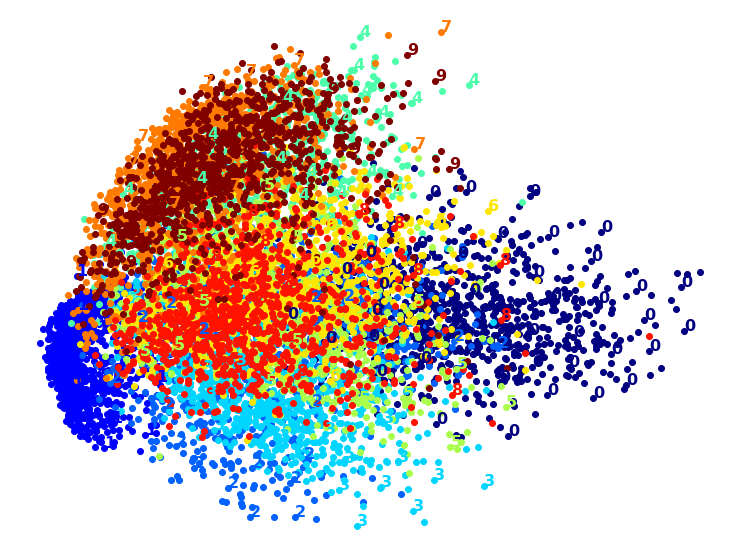

In [23]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE took 172.2s.


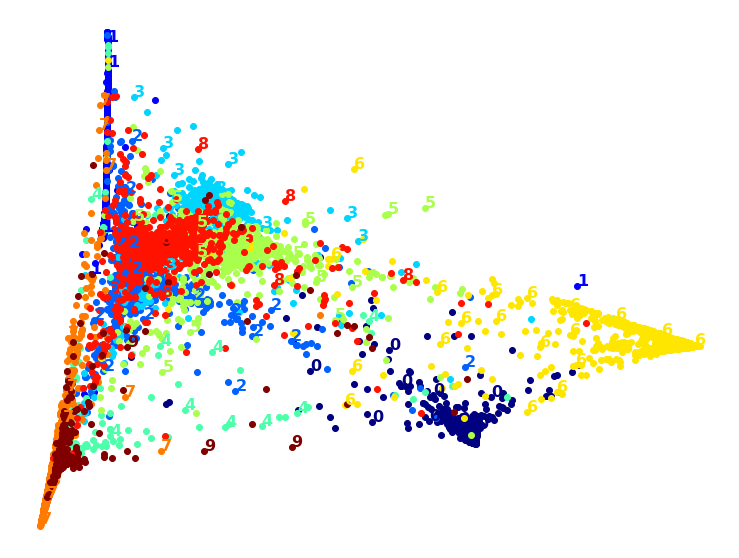

In [24]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 49.5s.


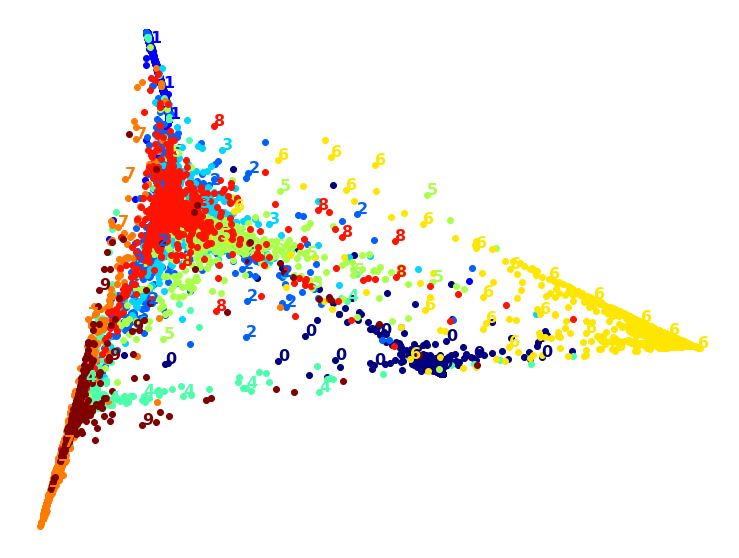

In [25]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS took 113.6s (on just 2,000 MNIST images instead of 10,000).


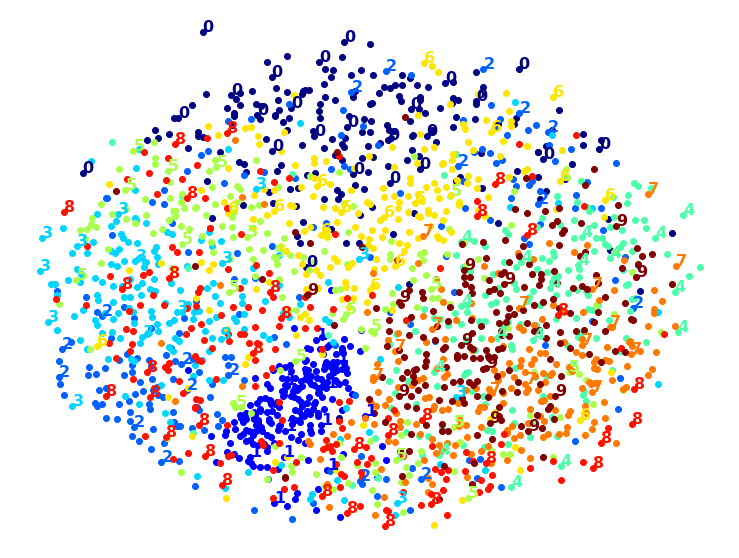

In [26]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA+MDS took 112.8s (on 2,000 MNIST images).


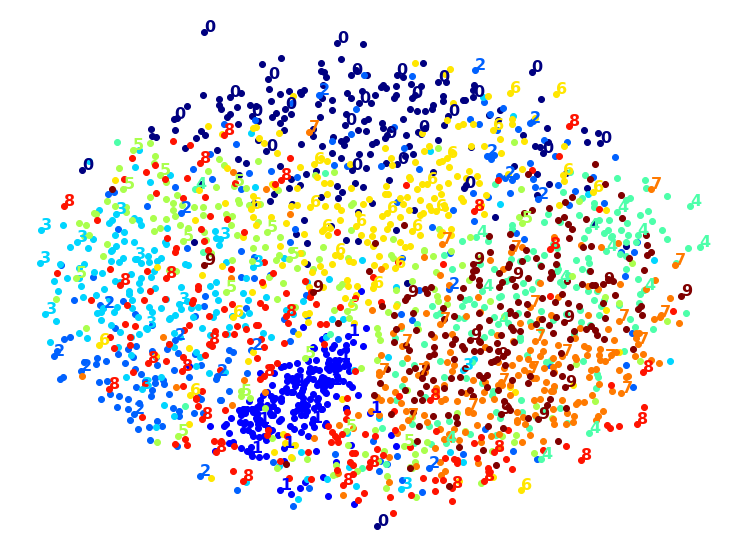

In [27]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

LDA took 2.1s.


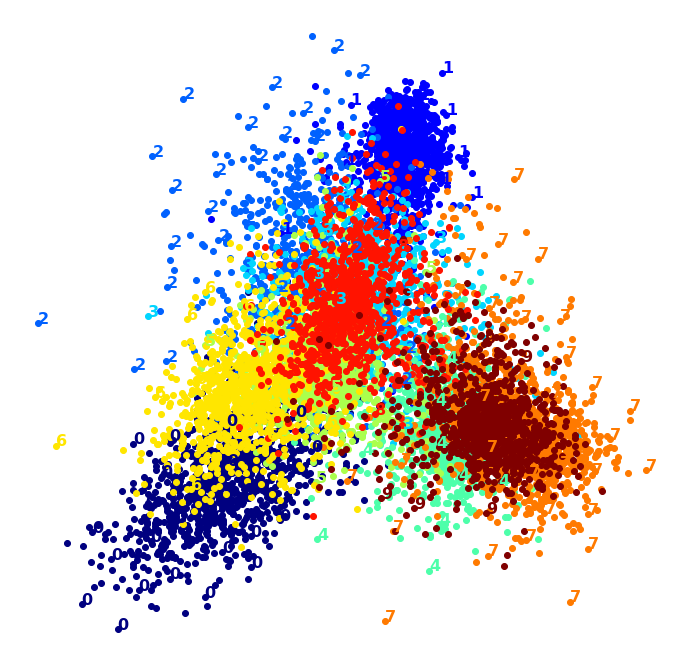

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

t-SNE took 224.4s.


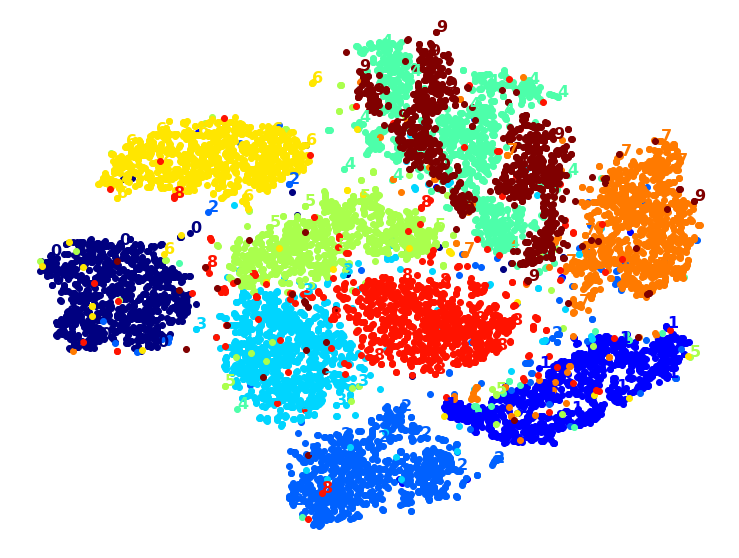

In [29]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA+t-SNE took 99.9s.


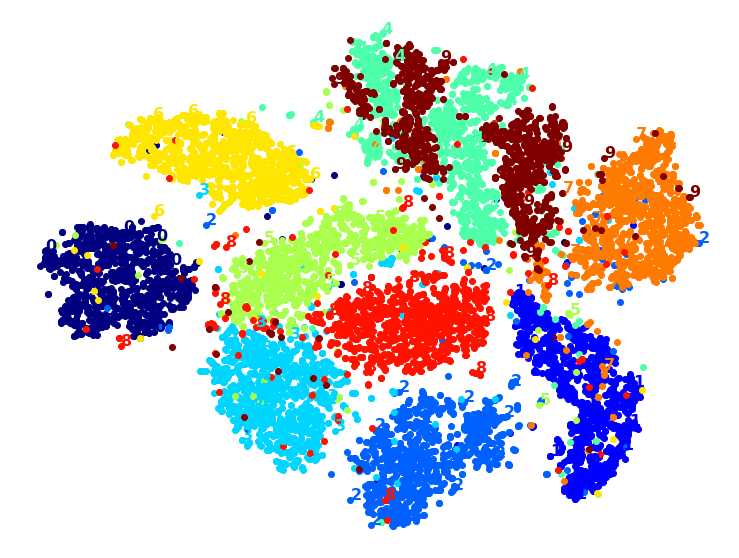

In [30]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

# TSNE works the best here for visualisations and works even faster with PCA as a preprocessing step. 

PCA is good at speeding up any of these dimensionality reduction algorithms 